In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
from endgame import hist2d
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde
import pickle as pkl
from utils import u_plot as uplot
import pandas as pd
from scipy.stats import gaussian_kde, linregress
import matplotlib.cm as cm
from utils import u_met
import seaborn
import metpy
from metpy import calc
from metpy.units import units
import statsmodels.api as sm
from scipy import ndimage

import io
import xarray as xr

from numpy.polynomial import polynomial as P

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (40., 40.)
%matplotlib inline

In [4]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [6]:
cmip_models = ['MPI-ESM1-2-LR', 'CESM2', 'IPSL-CM6A-LR', 'EC-Earth3', 'CNRM-CM6-1']#, 'EC-Earth3']

In [7]:
experiments = {'historical' : (1980,2007), 'ssp585': (2080,2101), 'amip-lfmip-pdLC_hist' : (1980,2007), 'amip-lfmip-pdLC_fut' : (2080,2101)}

In [27]:
pup = 70000
pdown = 85000

exp ='historical'
tas_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/tas*.nc', concat_dim='model', combine='nested').load()
uah_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
vah_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
ual_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
val_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
ushear_hist = uah_hist - ual_hist
vshear_hist = vah_hist - val_hist
prw_hist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/prw*.nc', concat_dim='model', combine='nested').load()

exp ='ssp585'
tas_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/tas*.nc', concat_dim='model', combine='nested').load()
uah_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
vah_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
ual_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
val_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
ushear_fut = uah_fut - ual_fut
vshear_fut = vah_fut - val_fut
prw_fut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/prw*.nc', concat_dim='model', combine='nested').load()

exp ='amip-lfmip-pdLC_hist'
tas_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/tas*.nc', concat_dim='model', combine='nested').load()
uah_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pup).load()
vah_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pup).load()
ual_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
val_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
ushear_ahist = uah_ahist - ual_ahist
vshear_ahist = vah_ahist - val_ahist
prw_ahist = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/prw*.nc', concat_dim='model', combine='nested').load()

exp ='amip-lfmip-pdLC_fut'
tas_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/tas*.nc', concat_dim='model', combine='nested').load()
uah_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
vah_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pup).load().load()
ual_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/ua*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
val_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/va*.nc', concat_dim='model', combine='nested').sel(plev=pdown).load().load()
ushear_afut = uah_afut - ual_afut
vshear_afut = vah_afut - val_afut
prw_afut = xr.open_mfdataset(cnst.lmcs_drive+'CMIP6/LS3MIP/slices_30y_regrid/'+exp+'/prw*.nc', concat_dim='model', combine='nested').load()

In [25]:
ua_afut.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    axis:           Z
    positive:       down
    requested:      100000. 92500. 85000. 70000. 60000. 50000. 40000. 30000. ...
    standard_name:  air_pressure
    title:          pressure
    type:           double
    units:          Pa

In [10]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    #rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.8,edgecolor='w',facecolor='none', zorder=99)
        
    #ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('K')

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


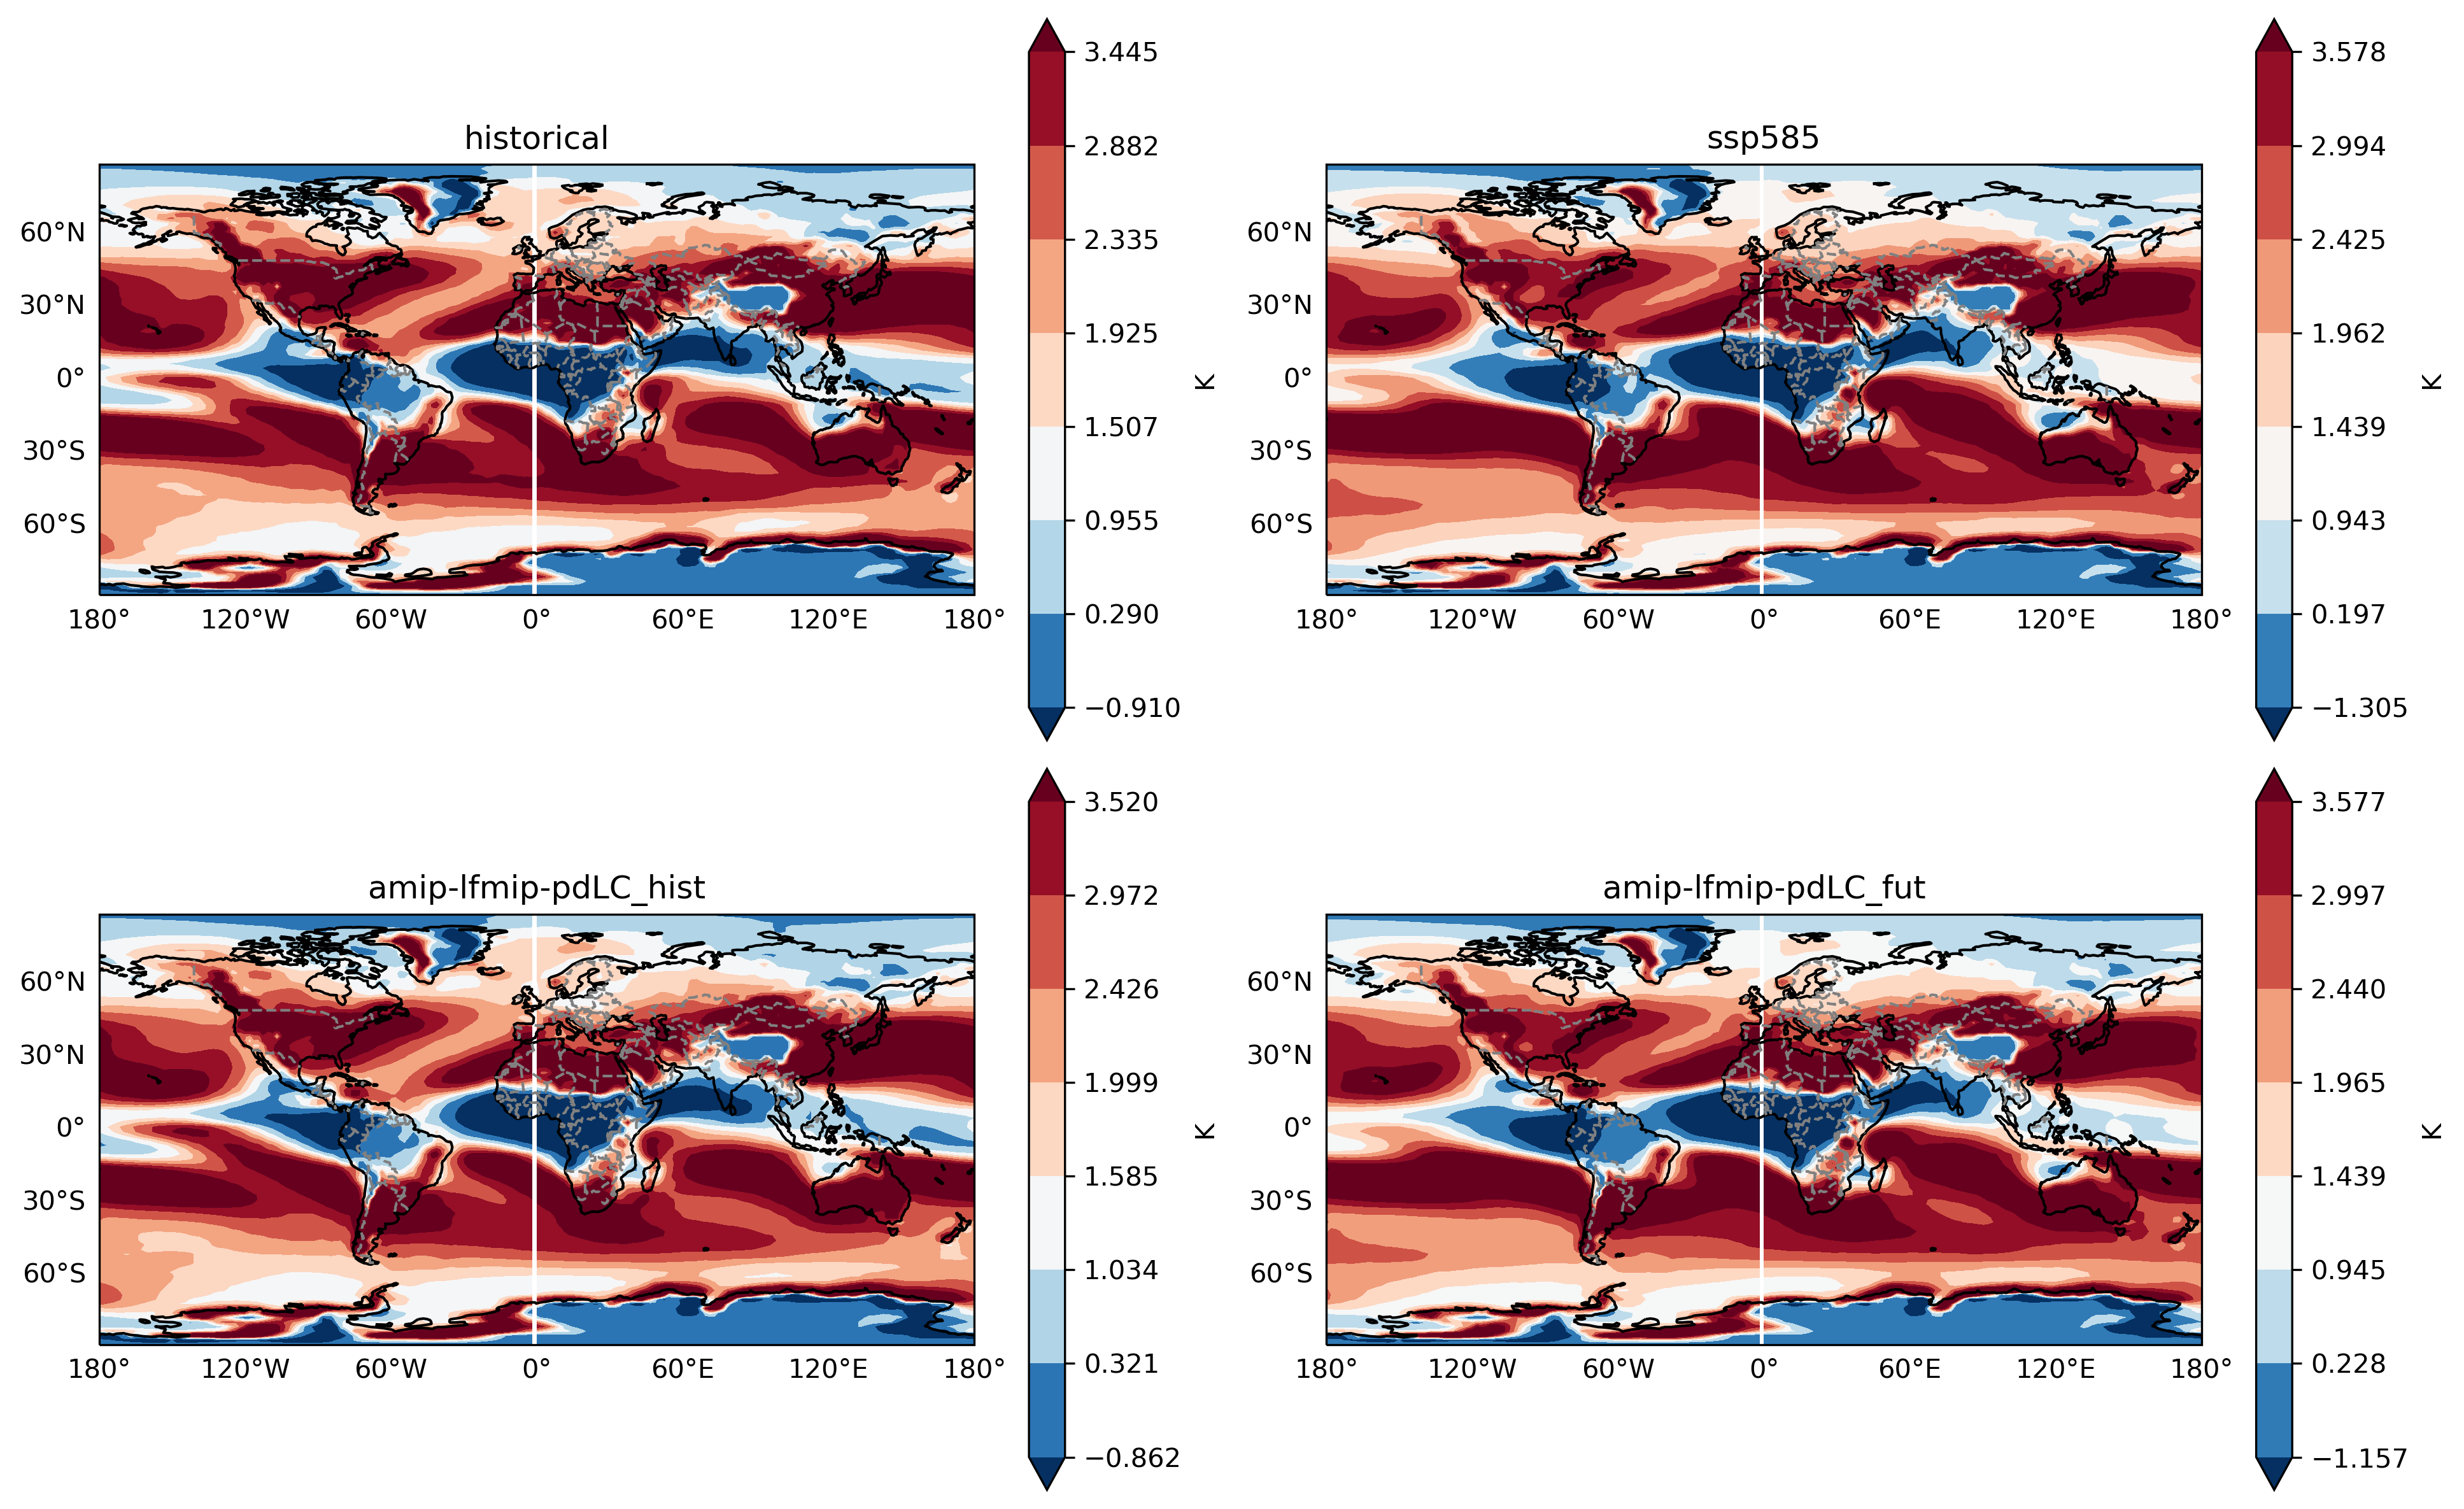

In [33]:
VAR='ua'
f = plt.figure(figsize=(13,8), dpi=300)
for ids, k in enumerate([ushear_hist, ushear_fut, ushear_ahist, ushear_afut]):
    ax = f.add_subplot(2,2,1+ids, projection=ccrs.PlateCarree())
    text = list(experiments.keys())[ids]
    draw_map(ax, k.mean('model')[VAR], k.lat, k.lon, title=text, levels=np.percentile(k.mean('model')[VAR], np.arange(5,91,11)))
    f.canvas.draw()
    plt.tight_layout()

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


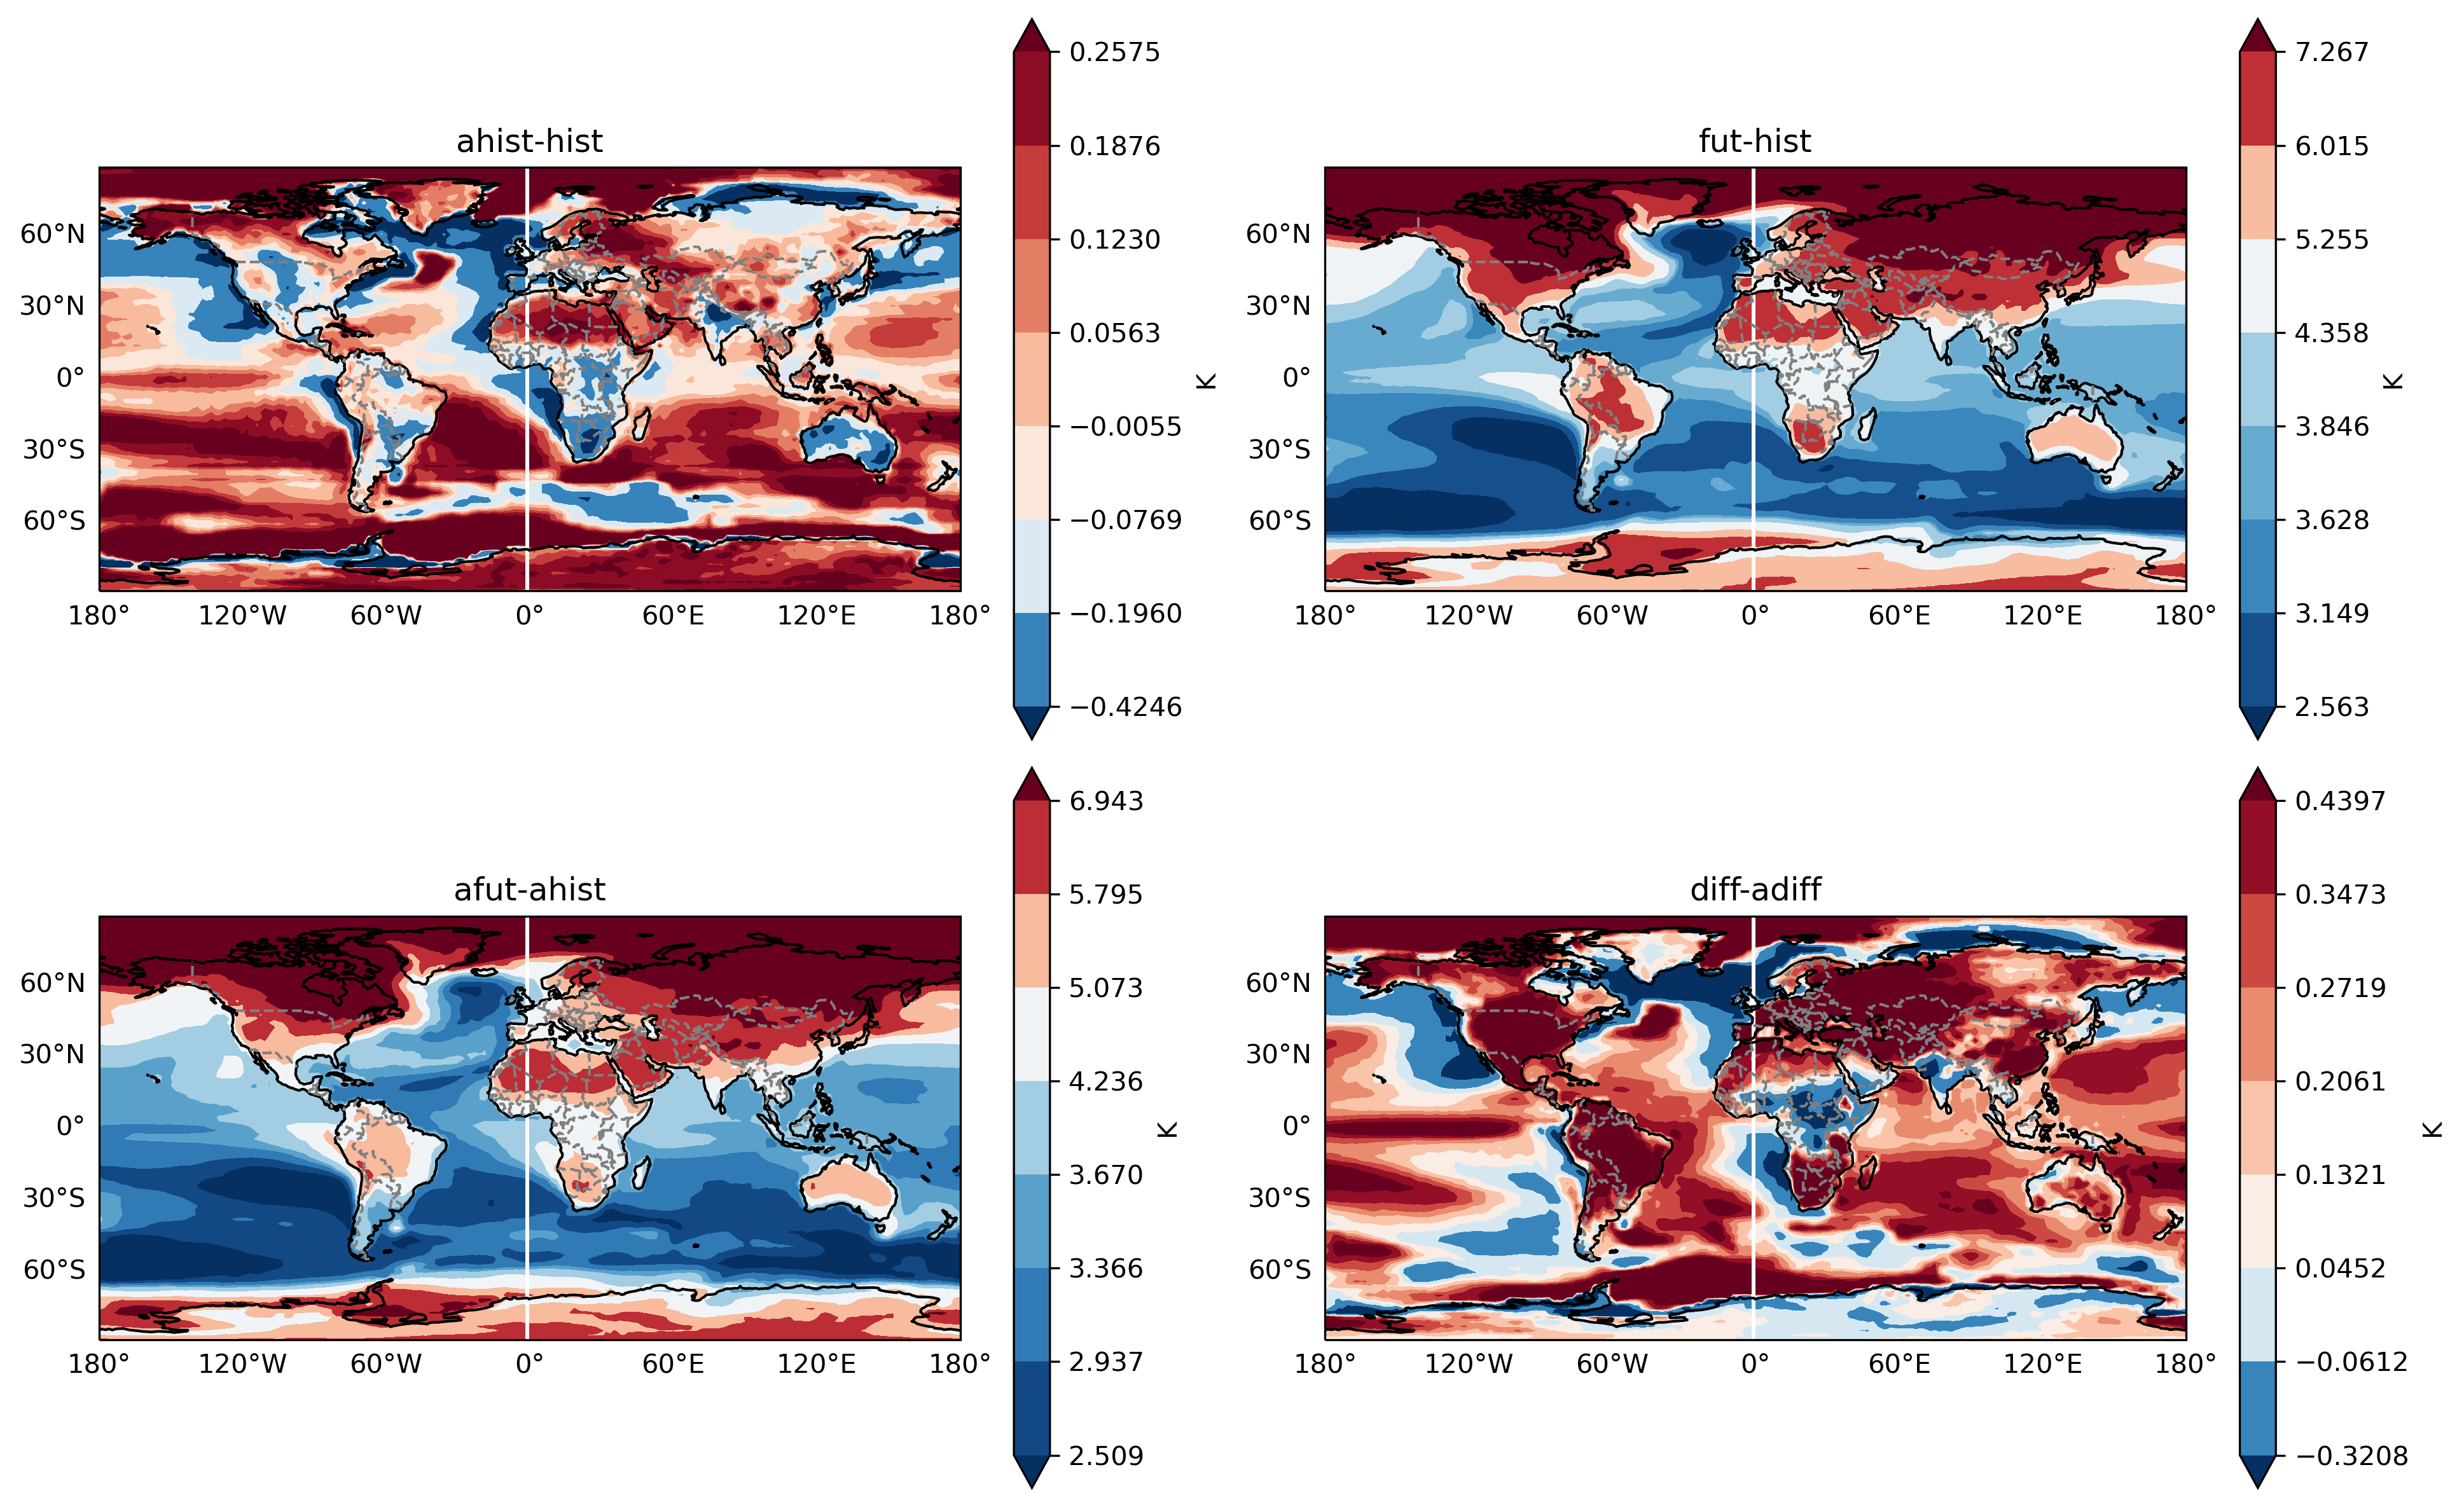

In [18]:
VAR='tas'
f = plt.figure(figsize=(13,8), dpi=300)

diffhist = tas_ahist.mean('model')[VAR]-tas_hist.mean('model')[VAR]
diff = tas_fut.mean('model')[VAR]-tas_hist.mean('model')[VAR]
adiff = tas_afut.mean('model')[VAR]-tas_ahist.mean('model')[VAR]
fulldiff = diff - adiff

titles = ['ahist-hist', 'fut-hist', 'afut-ahist', 'diff-adiff']

for ids, k in enumerate([diffhist,diff,adiff,fulldiff]):
    ax = f.add_subplot(2,2,1+ids, projection=ccrs.PlateCarree())
    text = list(experiments.keys())[ids]
    draw_map(ax, k, k.lat, k.lon, title=titles[ids], levels=np.percentile(k, np.arange(5,91,11)))
    f.canvas.draw()
    plt.tight_layout()

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


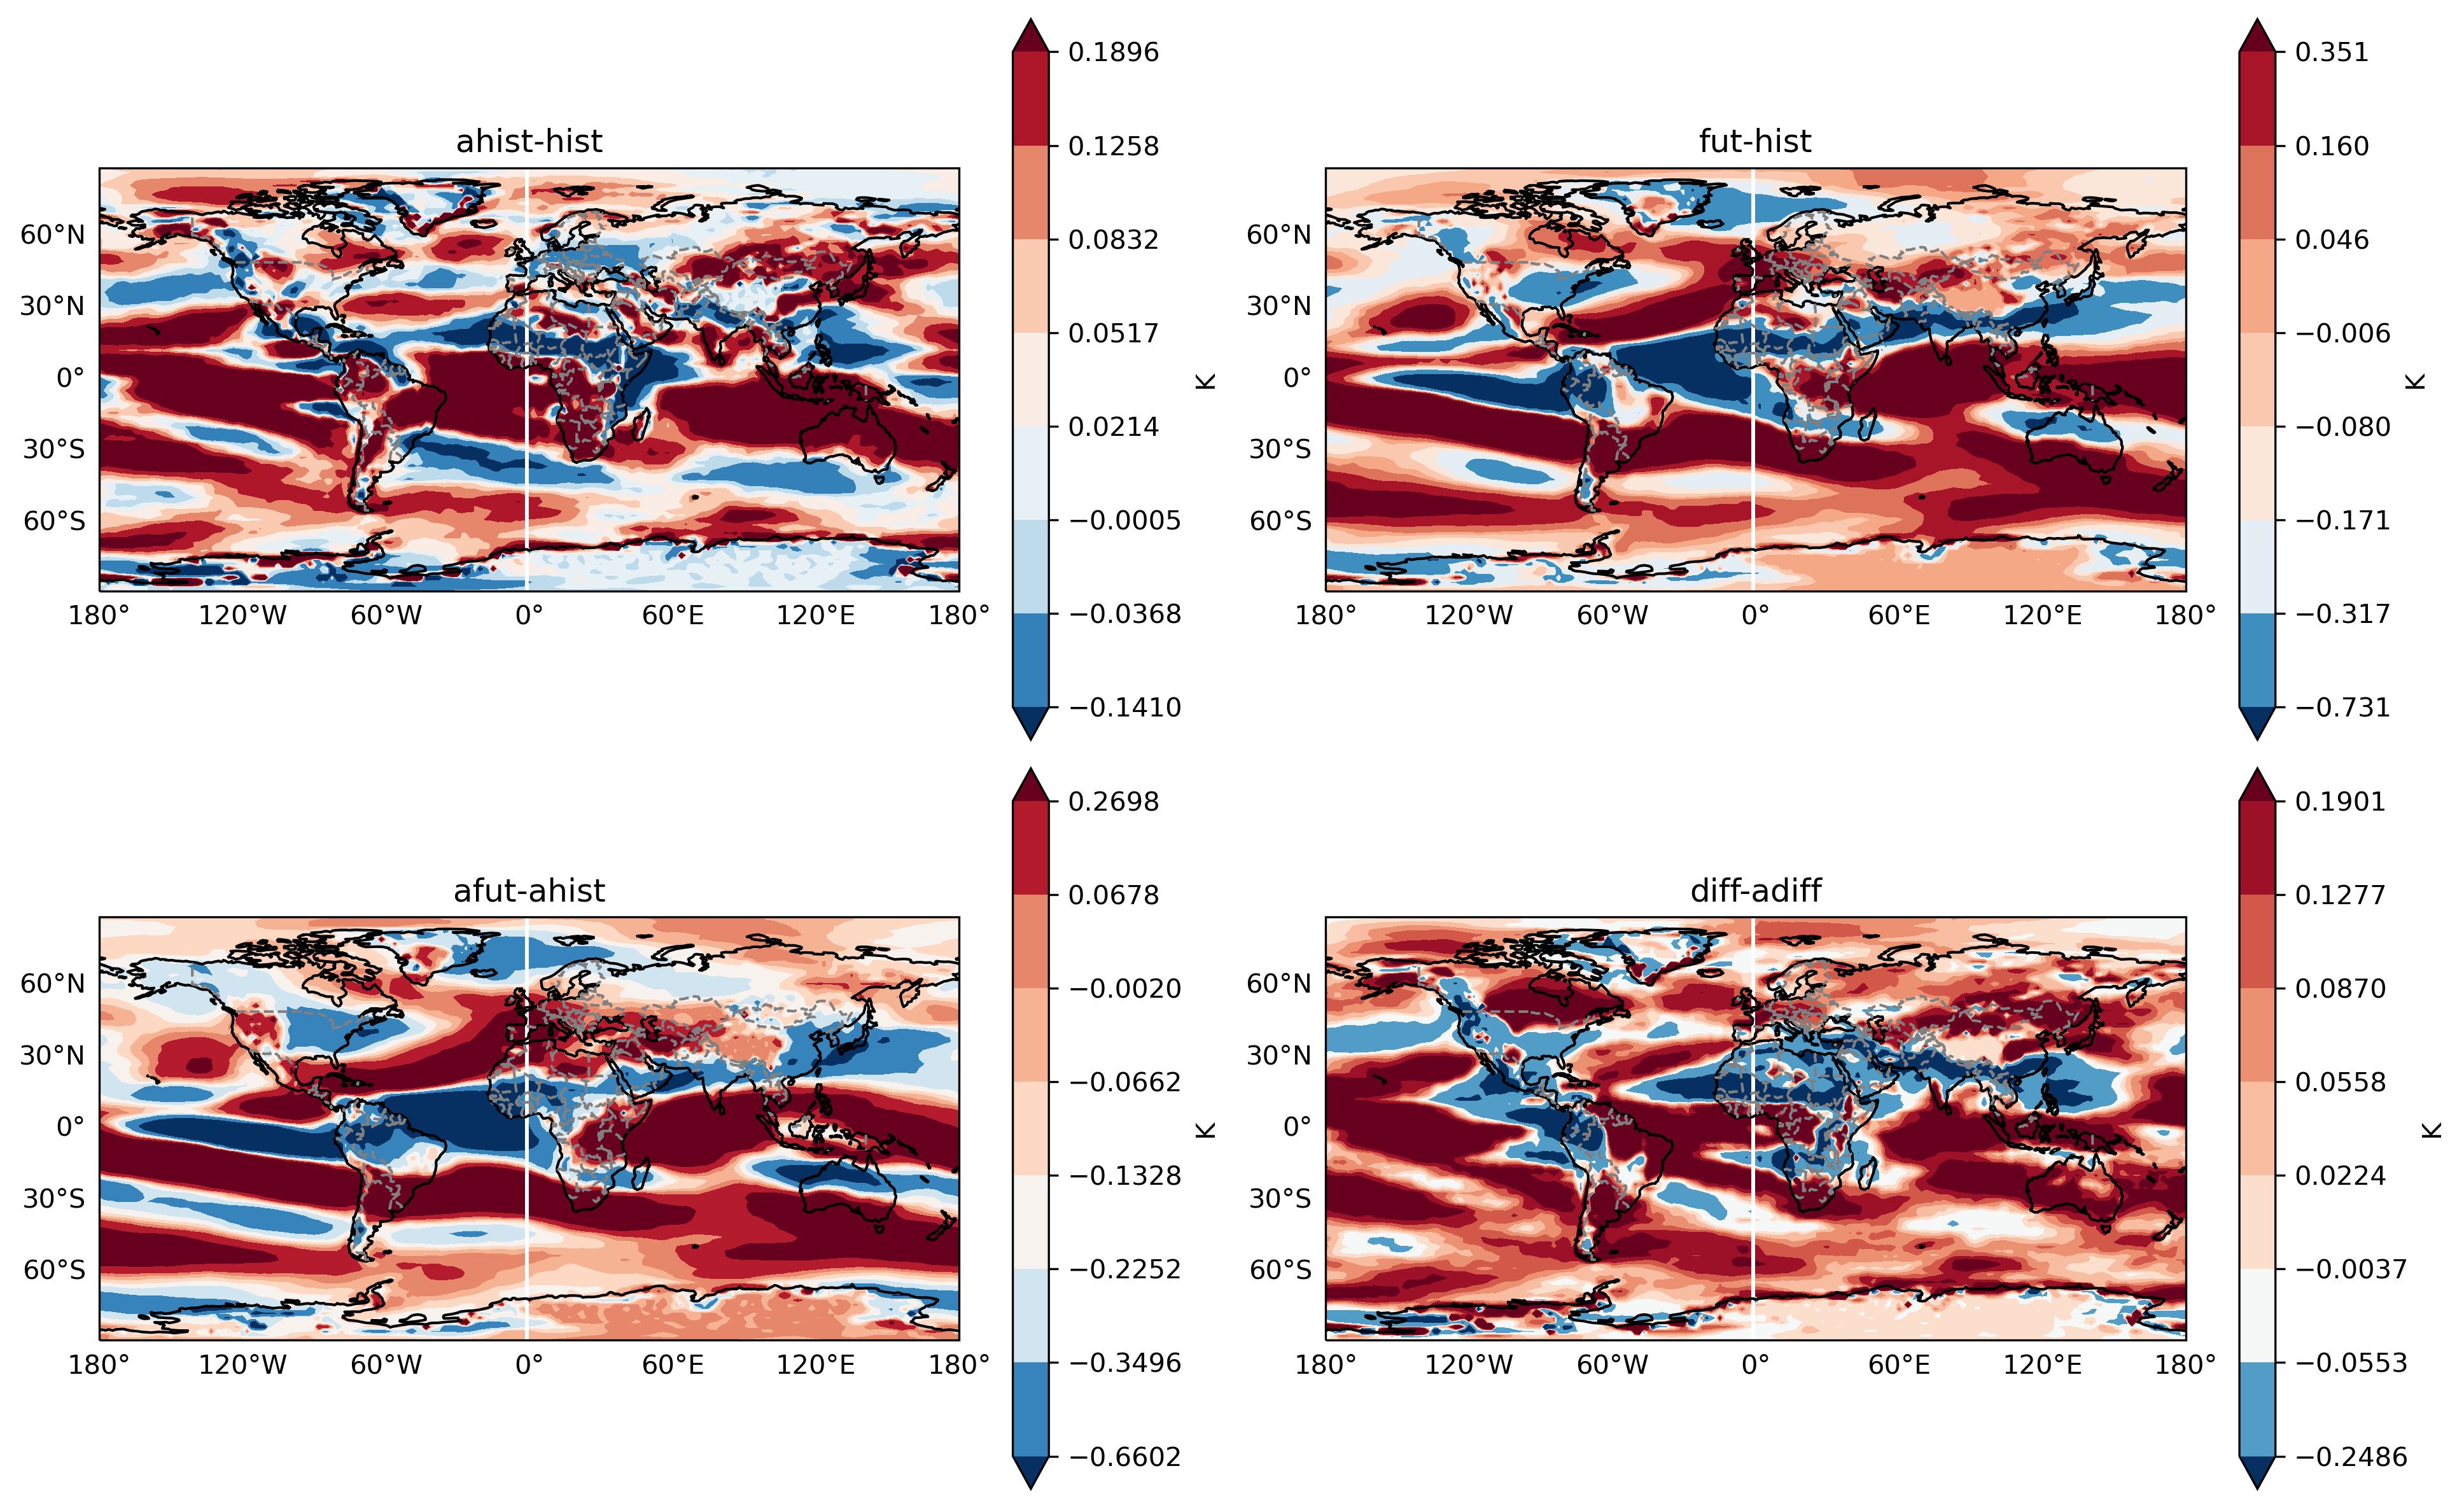

In [30]:
VAR='ua'
f = plt.figure(figsize=(13,8), dpi=300)

diffhist = ushear_ahist.mean('model')[VAR]-ushear_hist.mean('model')[VAR]
diff = ushear_fut.mean('model')[VAR]-ushear_hist.mean('model')[VAR]
adiff = ushear_afut.mean('model')[VAR]-ushear_ahist.mean('model')[VAR]
fulldiff = diff - adiff

titles = ['ahist-hist', 'fut-hist', 'afut-ahist', 'diff-adiff']

for ids, k in enumerate([diffhist,diff,adiff,fulldiff]):
    ax = f.add_subplot(2,2,1+ids, projection=ccrs.PlateCarree())
    text = list(experiments.keys())[ids]
    draw_map(ax, k, k.lat, k.lon, title=titles[ids], levels=np.percentile(k, np.arange(5,91,11)))
    f.canvas.draw()
    plt.tight_layout()

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


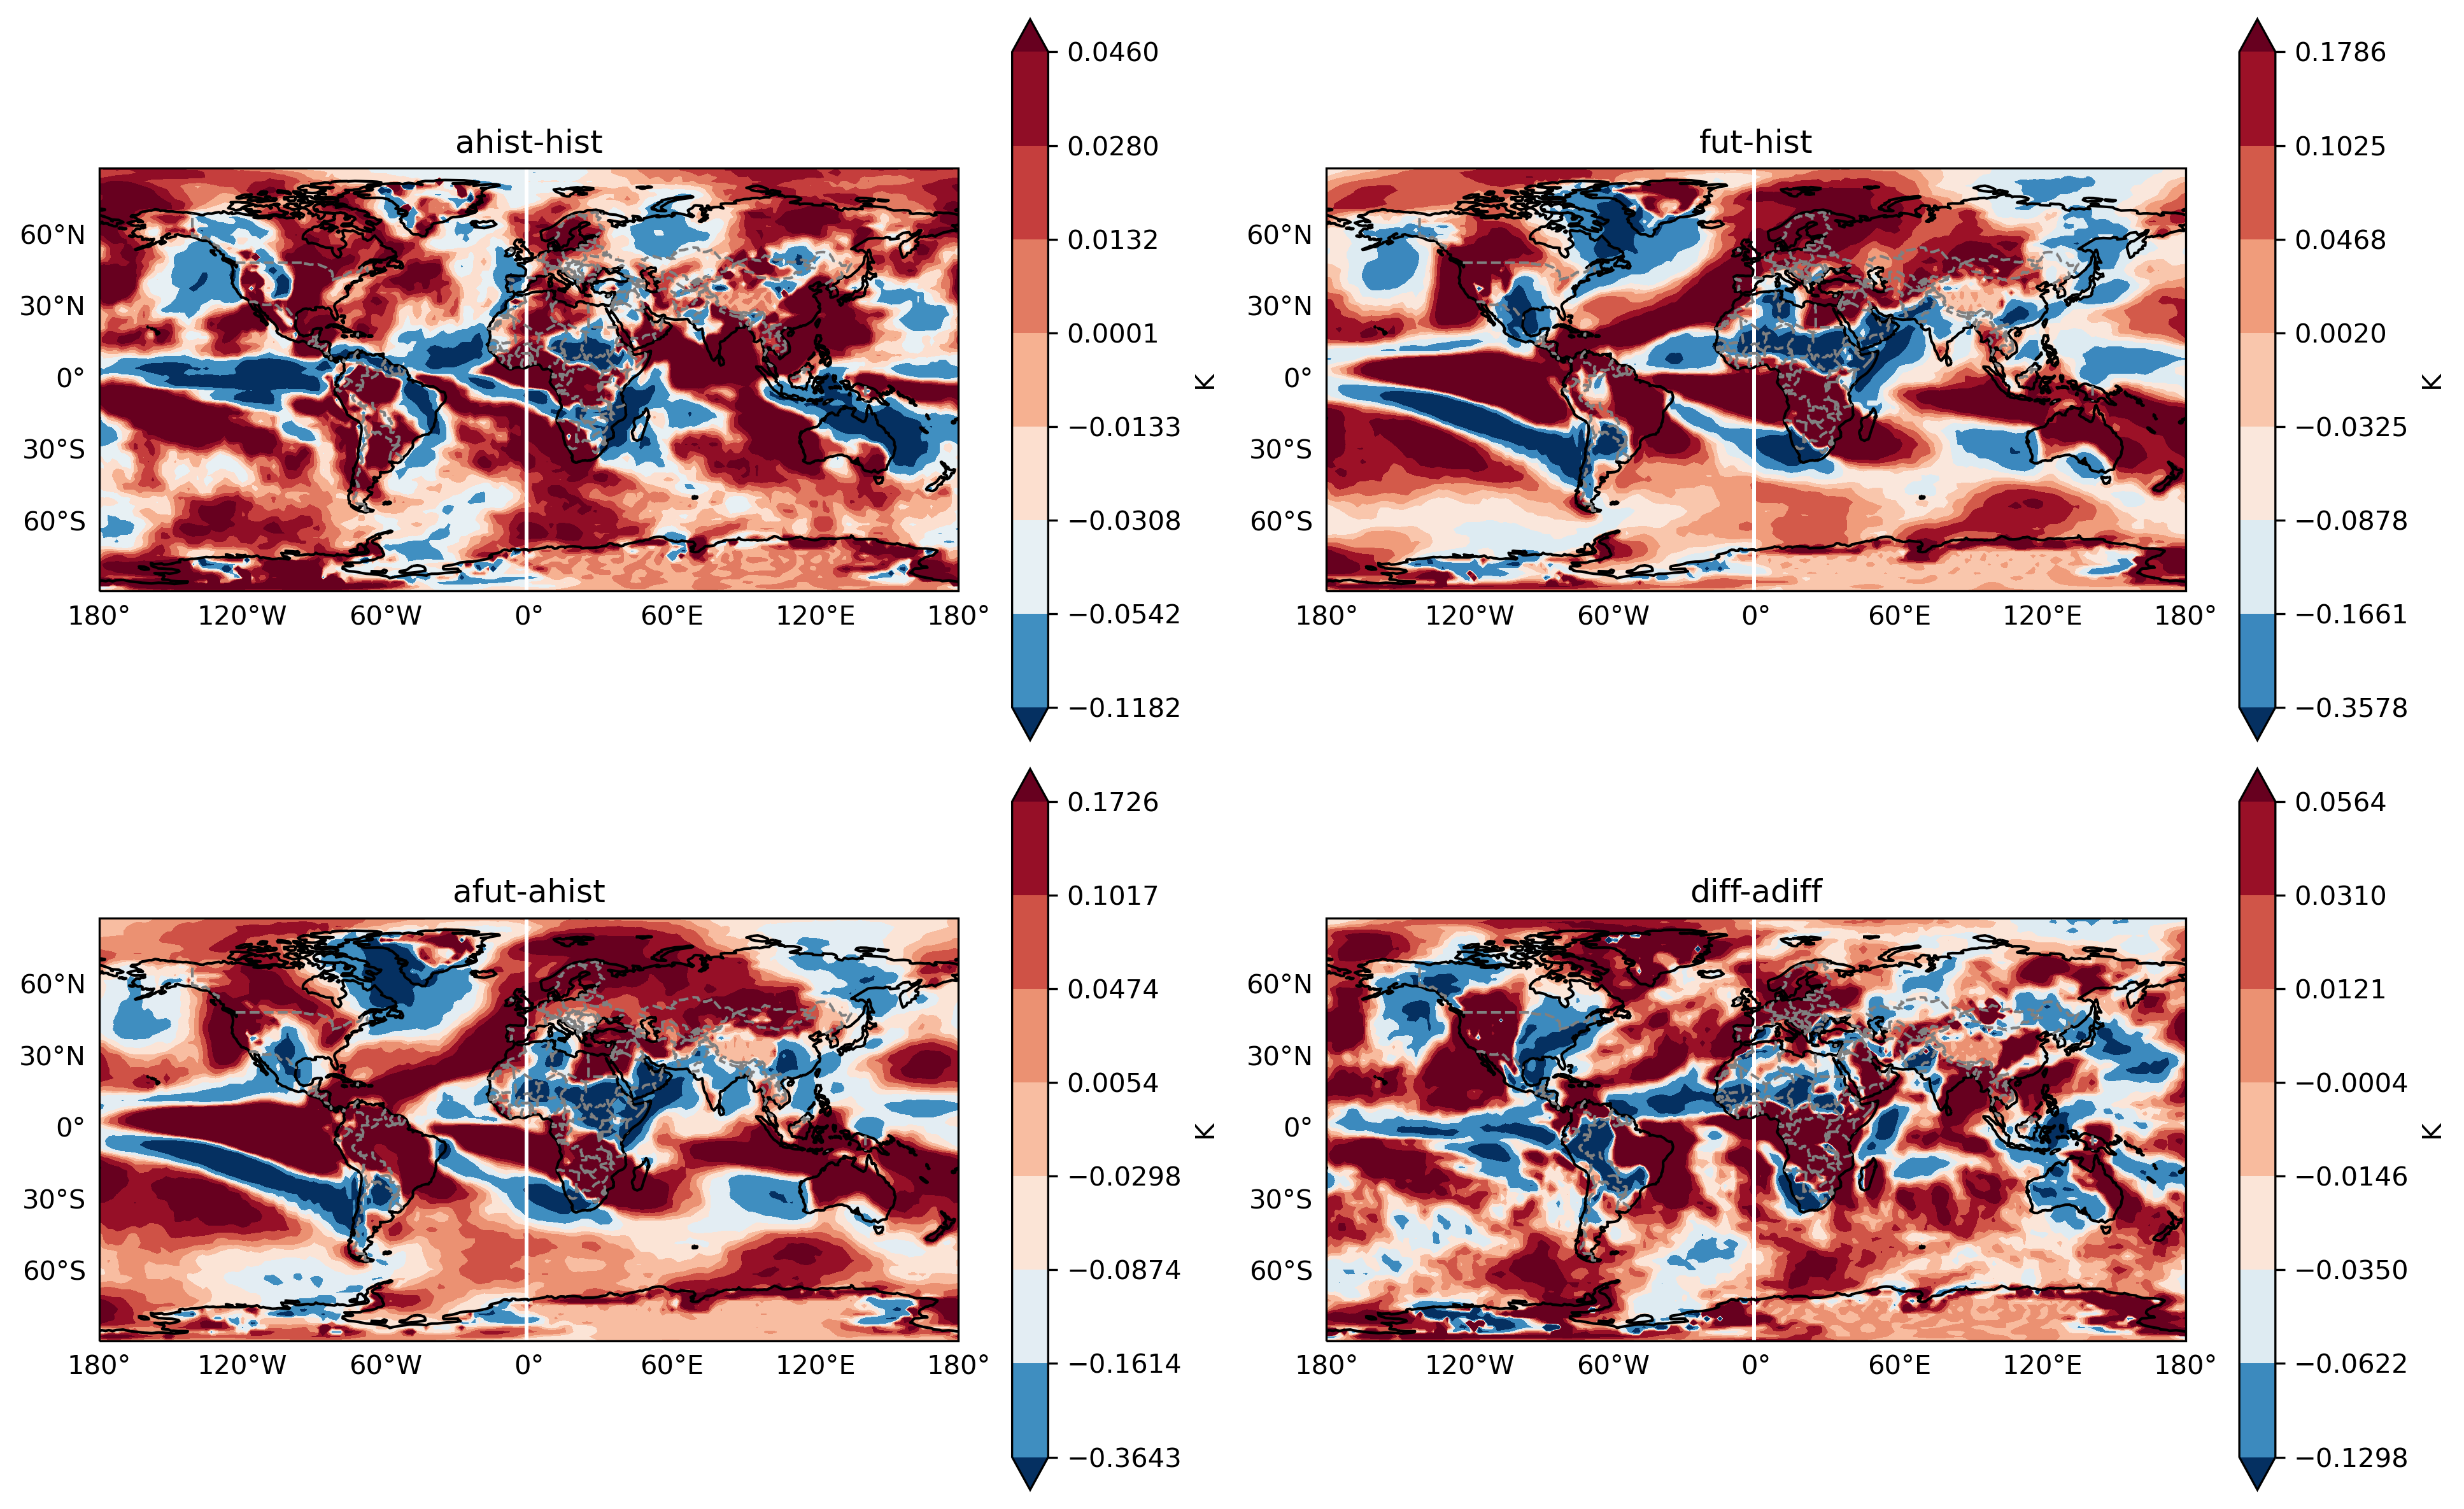

In [31]:
VAR='va'
f = plt.figure(figsize=(13,8), dpi=300)

diffhist = vshear_ahist.mean('model')[VAR]-vshear_hist.mean('model')[VAR]
diff = vshear_fut.mean('model')[VAR]-vshear_hist.mean('model')[VAR]
adiff = vshear_afut.mean('model')[VAR]-vshear_ahist.mean('model')[VAR]
fulldiff = diff - adiff

titles = ['ahist-hist', 'fut-hist', 'afut-ahist', 'diff-adiff']

for ids, k in enumerate([diffhist,diff,adiff,fulldiff]):
    ax = f.add_subplot(2,2,1+ids, projection=ccrs.PlateCarree())
    text = list(experiments.keys())[ids]
    draw_map(ax, k, k.lat, k.lon, title=titles[ids], levels=np.percentile(k, np.arange(5,91,11)))
    f.canvas.draw()
    plt.tight_layout()